### Loan Analysis

此數據包含客戶的還款情況以及客戶的收入、信用紀錄、貸款用途與其他個人信息。<br>
還款情況分別為已清償(Fully Paid)及呆帳(Charged Off)。<br>
分析目標為檢視客戶特徵與環款情況之關聯性，以及利用現有的客戶資料建立預測模型。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('bone')

In [2]:
data = pd.read_csv('Kaggle_credit.csv')
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


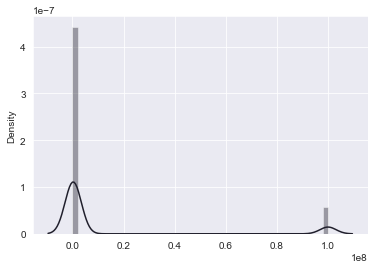

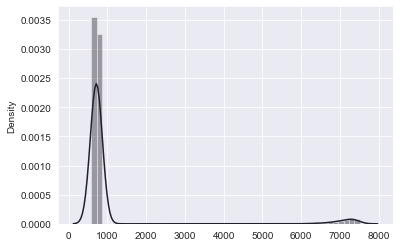

In [6]:
sns.distplot(x = df['Current Loan Amount'])
plt.show()
sns.distplot(x = df['Credit Score'])
plt.show()

In [7]:
sum(df['Current Loan Amount'] == 99999999)

11484

[Current Loan Amount]及[Credit Score]有資料誤植的情形。

#### Remove Missing Value, Duplicate and Typing errors

In [8]:
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


Duplicate Data: 10728


In [9]:
df = df.dropna(axis=0, how='all')
df = df.drop_duplicates()
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Months since last delinquent    48337
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64


Duplicate Data: 0


In [10]:
df[df['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.00,NaN,10.00,1.00,59888.00,372746.00,1.00,0.00
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.00,Short Term,721.00,662074.00,4 years,Rent,Other,1704.87,14.90,50.00,3.00,0.00,33250.00,120340.00,0.00,0.00
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.00,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.50,70.00,7.00,0.00,286387.00,908490.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,25.00,5.00,0.00,241319.00,476806.00,0.00,0.00
99979,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,Fully Paid,766392.00,Short Term,717.00,1891070.00,7 years,Home Mortgage,Debt Consolidation,41130.82,15.40,NaN,20.00,1.00,604485.00,969430.00,1.00,0.00
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.00,Short Term,708.00,1356068.00,4 years,Home Mortgage,Debt Consolidation,22318.54,22.70,21.00,25.00,0.00,387410.00,1705616.00,0.00,0.00
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.00,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.30,NaN,9.00,0.00,87875.00,239404.00,0.00,0.00


In [11]:
df[(df['Loan ID'] == '32200a7e-c65e-4e5e-9878-1161d256bcfe') | (df['Loan ID'] == '09997824-a068-4fb6-85dd-3ee8d6c0b532')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
180,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,234806.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
656,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00


仍有7786比資料重複，重複的資料分別為部分誤值及缺失值，將去除包含誤植與缺失值的重複資料。

In [12]:
df[(df['Loan ID'].duplicated(keep=False)) & (df['Current Loan Amount'] == 99999999)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,Fully Paid,99999999.00,Short Term,724.00,1029857.00,1 year,Rent,Debt Consolidation,13817.18,12.00,NaN,6.00,0.00,138339.00,221232.00,0.00,0.00
72,ce3eb521-f562-4183-b307-276cd39f65f7,decb6753-c45f-4f8a-ae0d-e8b26d246998,Fully Paid,99999999.00,Short Term,699.00,2770162.00,5 years,Home Mortgage,Debt Consolidation,48708.40,25.60,25.00,13.00,0.00,348802.00,449262.00,0.00,0.00
119,1bbbdaa8-a43d-4371-ad48-8f341a267fa0,942d2eb9-a841-4b19-96c3-a9aaa73b0dcf,Fully Paid,99999999.00,Short Term,709.00,1806083.00,10+ years,Home Mortgage,Debt Consolidation,29348.92,16.10,25.00,22.00,0.00,492556.00,724680.00,0.00,0.00
172,eafd6d30-8050-4721-b1ba-349cf8e69566,76c63206-8f06-45f1-9973-be2cda8dc4fa,Fully Paid,99999999.00,Short Term,725.00,1048363.00,10+ years,Rent,Debt Consolidation,14152.91,21.00,NaN,11.00,1.00,210045.00,299156.00,1.00,0.00
229,8a4b9286-5a22-4856-a8f0-ce361c150760,9f11cce9-12a9-48ff-a776-62aa7f6beebf,Fully Paid,99999999.00,Short Term,724.00,687420.00,4 years,Rent,other,6530.49,11.10,49.00,4.00,0.00,18715.00,37620.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99893,c201c29c-4cc3-487f-aaa8-3acaf898c930,e4913130-1296-4b87-847f-3b5ea7430446,Fully Paid,99999999.00,Long Term,689.00,948005.00,3 years,Home Mortgage,Debt Consolidation,24648.13,11.80,69.00,11.00,0.00,205637.00,269962.00,0.00,0.00
99903,d74fee1d-705c-4b30-ac3d-05856f938b49,8092298d-ae8f-4548-b699-b36034622211,Fully Paid,99999999.00,Long Term,723.00,1907315.00,10+ years,Rent,Debt Consolidation,41166.16,22.20,NaN,7.00,1.00,244853.00,700040.00,1.00,0.00
99913,7f59eb3a-1508-46c6-9474-b34ba9d242ab,c773b789-2b37-4e6a-9354-7816562ac5ce,Fully Paid,99999999.00,Long Term,642.00,1796716.00,10+ years,Home Mortgage,Debt Consolidation,748.79,22.60,32.00,11.00,0.00,246297.00,639430.00,0.00,0.00
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,Fully Paid,99999999.00,Short Term,674.00,1058376.00,< 1 year,Home Mortgage,Other,11554.09,10.10,20.00,12.00,0.00,14098.00,333300.00,0.00,0.00


In [13]:
df.drop(df[(df['Loan ID'].duplicated(keep=False)) & (df['Current Loan Amount'] == 99999999)].index, axis=0, inplace=True)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 4207


In [14]:
df[(df['Loan ID'].duplicated(keep=False)) & (df['Annual Income'].isna())]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
15,7cbaa3fa-16fd-4343-9bcb-e90b34a1072f,3ec886e7-f15d-4c35-83d0-bdec4817ae4b,Fully Paid,449020.00,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.40,NaN,8.00,0.00,334533.00,428956.00,0.00,0.00
42,dc17c812-a350-459f-84dd-906fd42a5ab2,847e2dfa-a44c-4ec1-b05f-5d4a33e66885,Fully Paid,327008.00,Long Term,NaN,NaN,4 years,Home Mortgage,Debt Consolidation,15419.45,16.70,24.00,13.00,0.00,268090.00,529738.00,0.00,0.00
83,747a1799-0cee-4e91-9b8c-1fcfe1d23906,d80034d4-37b2-4380-9546-3bc3c9025077,Fully Paid,444620.00,Short Term,NaN,NaN,2 years,Home Mortgage,Home Improvements,15292.34,11.80,NaN,9.00,0.00,373350.00,522742.00,0.00,0.00
95,ed6b4f20-6897-44b9-b36c-834f5f371853,bc653e0d-ccac-4114-b998-f53c9f2dffc8,Fully Paid,432080.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,35360.14,17.90,24.00,22.00,0.00,160550.00,685982.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,cdf2f31f-f04e-45f9-9ce2-2399235cd6fb,56a0ba34-abcd-413a-8c82-0fc0404bec6f,Fully Paid,217690.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,13393.10,23.50,75.00,22.00,0.00,162583.00,415602.00,0.00,0.00
99875,df28f3e6-5367-41ae-8095-dbab79e67725,7ba713f2-571f-4516-9562-05bf0354889a,Fully Paid,162030.00,Short Term,NaN,NaN,10+ years,Rent,Other,11555.42,18.50,51.00,12.00,1.00,36024.00,353518.00,1.00,0.00
99977,205e344c-5291-4e26-9f67-499bdc04869f,5cdbc32a-08a5-4f7e-8cb2-f599d39abf57,Fully Paid,483428.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,19328.70,15.60,NaN,18.00,0.00,440572.00,824142.00,0.00,0.00
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,25.00,5.00,0.00,241319.00,476806.00,0.00,0.00


In [15]:
df.drop(df[(df['Loan ID'].duplicated(keep=False)) & (df['Annual Income'].isna())].index, axis = 0, inplace=True)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 0


In [16]:
print(df.isnull().sum()[df.isnull().sum()>0])

Credit Score                    14947
Annual Income                   14947
Years in current job             3508
Months since last delinquent    44621
Maximum Open Credit                 2
Bankruptcies                      175
Tax Liens                           8
dtype: int64


[Months since last delinquent]有48337個缺失值，占比極大，故將直接移除此變數。

In [17]:
df.drop(['Months since last delinquent'], axis = 1, inplace = True)
df.isnull().sum()[df.isnull().sum()>0]

Credit Score            14947
Annual Income           14947
Years in current job     3508
Maximum Open Credit         2
Bankruptcies              175
Tax Liens                   8
dtype: int64

收入與信用評分有大量缺失值，而此二項變數應是影響還款能力的重要因素，若貿然以他值取代恐造成分析失真，雖移除缺失值將失去大量資料，但為避免影響模型準確度，將直接移除。

In [18]:
df.drop(df[df['Credit Score'].isna()].index, axis=0, inplace=True)
print(df.isnull().sum()[df.isnull().sum()>0])

Years in current job    2856
Maximum Open Credit        1
Bankruptcies             140
Tax Liens                  5
dtype: int64


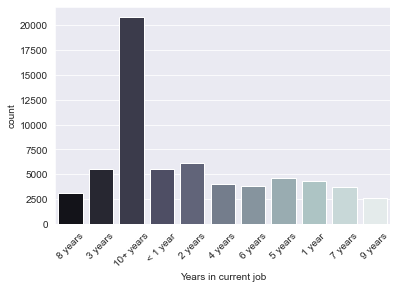

In [19]:
sns.countplot(x = df['Years in current job'], palette='bone')
plt.xticks(rotation = 45)
plt.show()

In [20]:
years_order = ['< 1 year','1 year','2 years','3 years',
               '4 years','5 years','6 years','7 years',
               '8 years','9 years','10+ years']

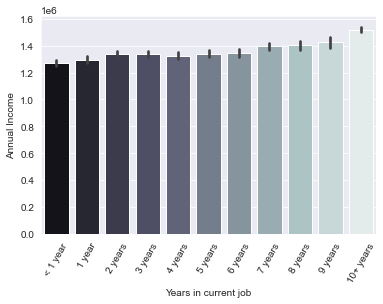

In [21]:
sns.barplot(x = df['Years in current job'], y = df['Annual Income'], order = years_order, palette='bone')
plt.xticks(rotation = 60)
plt.show()

年收入與現職工作年數有正向關係，將去除年收入的極端值再檢視。

In [22]:
income_out = df.drop(df[(df['Annual Income'] < df['Annual Income'].mean() - 3*df['Annual Income'].std())|
                        (df['Annual Income'] > df['Annual Income'].mean() + 3*df['Annual Income'].std())].index,
                     axis=0)

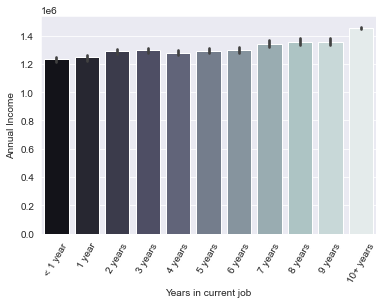

In [23]:
sns.barplot(x = income_out['Years in current job'], y = income_out['Annual Income'], order = years_order, palette='bone')
plt.xticks(rotation = 60)
plt.show()

正向關係依然存在，將依照年收入來填補工作年數的缺失值。

In [24]:
from sklearn.neighbors import KNeighborsClassifier
imputer = KNeighborsClassifier(n_neighbors=5)

In [25]:
income_notna = df['Annual Income'][df['Years in current job'].notna()]
jobyear_notna = df['Years in current job'][df['Years in current job'].notna()]
income_job_na = df['Annual Income'][df['Years in current job'].isna()]

In [26]:
imputer.fit(np.reshape(np.array(income_notna),(-1,1)), jobyear_notna)

KNeighborsClassifier()

In [27]:
imputed = imputer.predict(np.reshape(np.array(income_job_na),(-1,1)))

In [28]:
for i in range(len(imputed)):
    df['Years in current job'] = df['Years in current job'].fillna(value=imputed[i], limit=1)

In [29]:
df.isnull().sum()[df.isnull().sum()>0]

Maximum Open Credit      1
Bankruptcies           140
Tax Liens                5
dtype: int64

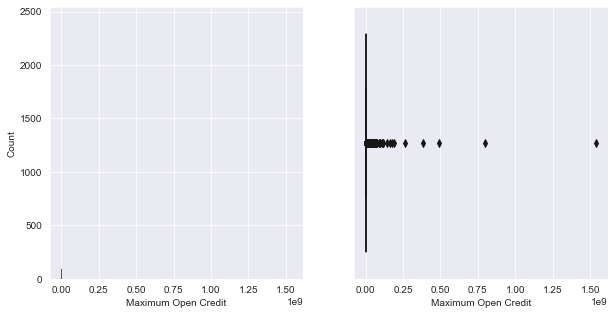

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x = df['Maximum Open Credit'])
plt.subplot(1,2,2)
sns.boxplot(df['Maximum Open Credit'])
plt.show()

In [31]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Bankruptcies    140
Tax Liens         5
dtype: int64

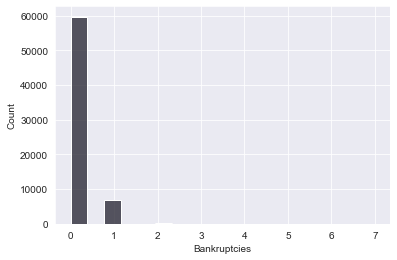

In [32]:
sns.histplot(x = df['Bankruptcies'])
plt.show()

In [33]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Tax Liens    5
dtype: int64

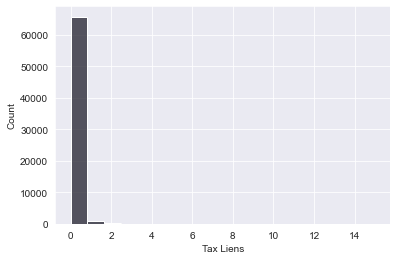

In [34]:
sns.histplot(x = df['Tax Liens'])
plt.show()

In [35]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

In [36]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00,67052.00
mean,12064184.35,1153.86,1376503.13,18383.60,18.27,11.13,0.16,294221.21,759857.62,0.11,0.03
std,32148444.38,1609.16,1113132.32,12178.13,7.04,5.00,0.48,378322.47,7492367.72,0.35,0.26
min,11242.00,585.00,76627.00,0.00,3.70,1.00,0.00,0.00,0.00,0.00,0.00
25%,180026.00,710.00,847860.75,10173.69,13.50,8.00,0.00,113202.00,278146.00,0.00,0.00
50%,312598.00,730.00,1170628.00,16129.10,17.00,10.00,0.00,210482.00,475266.00,0.00,0.00
75%,526196.00,743.00,1649257.00,23872.79,21.80,14.00,0.00,367407.75,795014.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [37]:
df.drop(df[df['Current Loan Amount'] == 99999999].index, axis=0,inplace=True)

In [38]:
pd.DataFrame(df['Credit Score'].describe())

,Credit Score
count,59147.00
mean,1209.48
std,1705.64
min,585.00
25%,707.00
50%,727.00
75%,742.00
max,7510.00


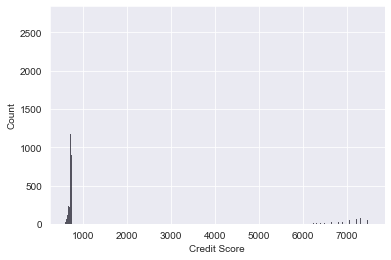

In [39]:
sns.histplot(df['Credit Score'])
plt.show()

In [40]:
df['Credit Score'][df['Credit Score'] > 1000].sort_values()

73449   5850.00
19823   5850.00
1723    5860.00
85342   5890.00
31362   5900.00
          ...  
76476   7510.00
57290   7510.00
83211   7510.00
27919   7510.00
64774   7510.00
Name: Credit Score, Length: 4551, dtype: float64

在[Credit Score]欄位中有4451筆資料多輸入一個0。

In [41]:
df['Credit Score'] = np.where(df['Credit Score'] > 1000,
                               df['Credit Score'] / 10,
                               df['Credit Score'])

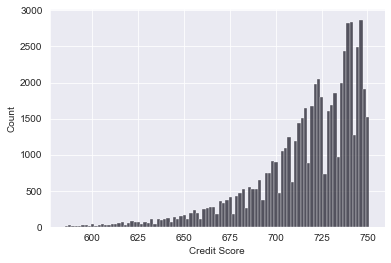

In [42]:
sns.histplot(x = df['Credit Score'])
plt.show()

In [43]:
df.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

In [44]:
df1 = df.copy()

#### Category features

In [45]:
df1['Loan_01'] = np.where(df1['Loan Status'] == 'Fully Paid', 0, 1)

##### Term

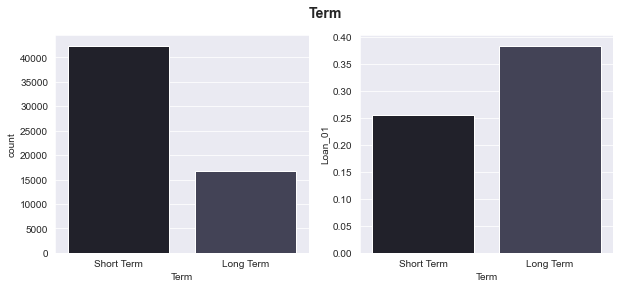

Charging off rate:
Long Term: 0.38
Short Term: 0.25


In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Term'])
plt.subplot(1,2,2)
sns.barplot(x=df1['Term'], y=df1['Loan_01'], ci=None)
plt.suptitle('Term', fontsize = 14, weight = 'bold')
plt.show()

print('Charging off rate:')
print('Long Term:',(df1['Term'][(df1['Term'] == 'Long Term')&(df1['Loan Status'] == 'Charged Off')].count() /df1['Term'][df1['Term'] == 'Long Term'].count()).round(2))
print('Short Term:',(df1['Term'][(df1['Term'] == 'Short Term')&(df1['Loan Status'] == 'Charged Off')].count() /df1['Term'][df1['Term'] == 'Short Term'].count()).round(2))

長期貸款有較高的呆帳率。

##### Years in Current Job

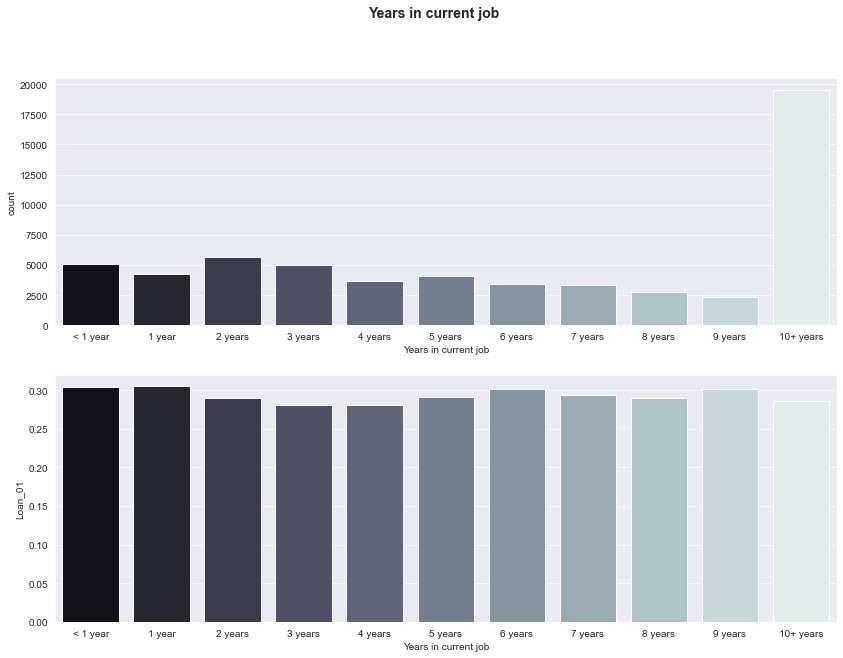

Charging off rate:
< 1 year 0.3
1 year 0.3
2 years 0.29
3 years 0.28
4 years 0.28
5 years 0.29
6 years 0.3
7 years 0.29
8 years 0.29
9 years 0.3
10+ years 0.29


In [47]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x = df1['Years in current job'], palette='bone', order=years_order)
plt.subplot(212)
sns.barplot(x=df1['Years in current job'], y=df1['Loan_01'], ci=None, palette='bone', order=years_order)
plt.suptitle('Years in current job', fontsize = 14, weight = 'bold')
plt.show()

print('Charging off rate:')
for i in years_order:
    print(str(i),(df1['Years in current job'][(df1['Years in current job'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Years in current job'][df1['Years in current job'] == i].count()).round(2))

現職工作年數對呆帳的影響較不明顯，呆帳率的差距僅1至2%。

In [48]:
for i in range(len(years_order)):
    df1['Years in current job'].replace(years_order[i], i, inplace=True)

##### Home Ownership

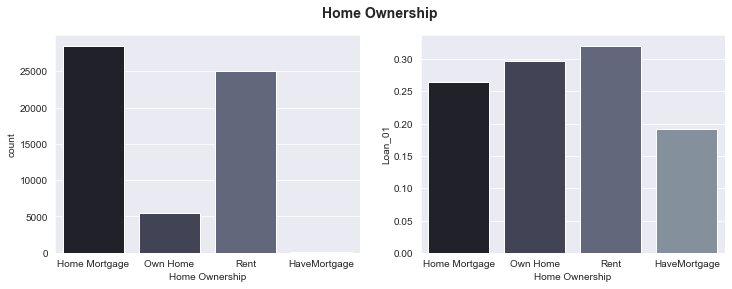

Home Mortgage    28507
Rent             25052
Own Home          5463
HaveMortgage       125
Name: Home Ownership, dtype: int64
Charging off rate:
Home Mortgage : 0.26
Own Home : 0.3
Rent : 0.32
HaveMortgage : 0.19


In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Home Ownership'])
plt.subplot(1,2,2)
sns.barplot(x=df1['Home Ownership'], y=df1['Loan_01'], ci=None)
plt.suptitle('Home Ownership', fontsize = 14, weight = 'bold')
plt.show()

print(df1['Home Ownership'].value_counts())
print('Charging off rate:')
for i in df1['Home Ownership'].unique():
    print(str(i),':',(df1['Home Ownership'][(df1['Home Ownership'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Home Ownership'][df1['Home Ownership'] == i].count()).round(2))

租房者有較高呆帳率，有抵押物的客戶最低。

##### Purpose

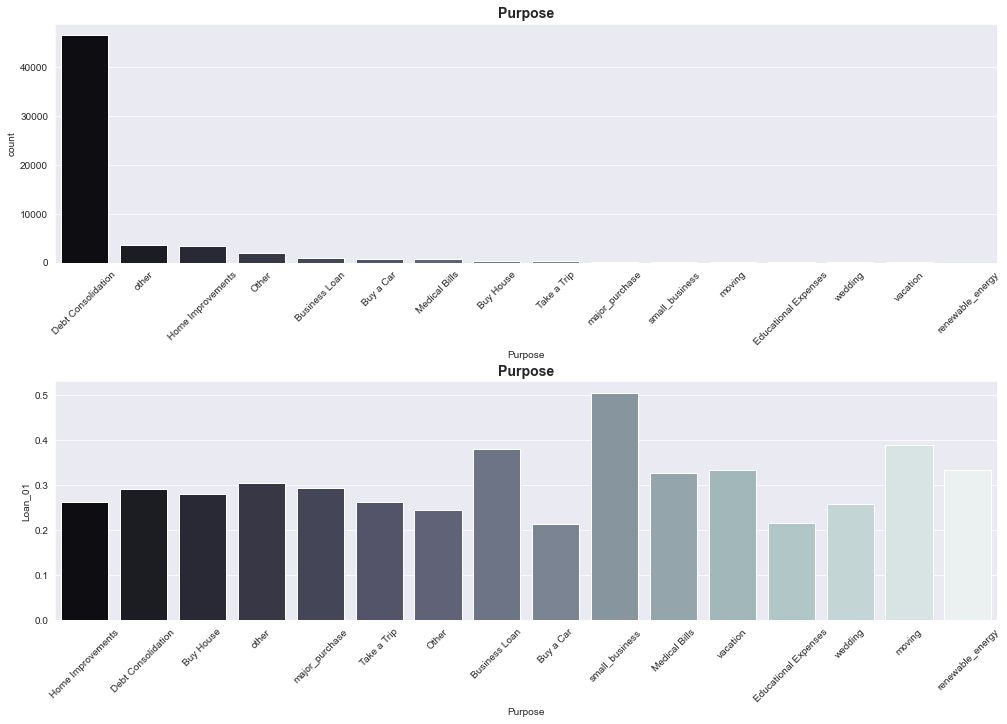

Debt Consolidation      46550
other                    3587
Home Improvements        3403
Other                    1873
Business Loan             954
Buy a Car                 747
Medical Bills             646
Buy House                 396
Take a Trip               328
major_purchase            215
small_business            180
moving                     90
Educational Expenses       60
wedding                    58
vacation                   54
renewable_energy            6
Name: Purpose, dtype: int64 

Charging off rate:
Home Improvements : 0.26
Debt Consolidation : 0.29
Buy House : 0.28
other : 0.31
major_purchase : 0.29
Take a Trip : 0.26
Other : 0.24
Business Loan : 0.38
Buy a Car : 0.21
small_business : 0.51
Medical Bills : 0.33
vacation : 0.33
Educational Expenses : 0.22
wedding : 0.26
moving : 0.39
renewable_energy : 0.33


In [50]:
pur_order = df1['Purpose'].value_counts().sort_values(ascending=False).index

plt.figure(figsize = (14,10))
plt.subplot(211)
sns.countplot(x = df1['Purpose'],order=pur_order, palette='bone')
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.subplot(212)
sns.barplot(x=df1['Purpose'], y=df1['Loan_01'], ci=None, palette='bone')
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.tight_layout(pad=0.5)
plt.show()

print(df1['Purpose'].value_counts(), '\n')
print('Charging off rate:')
for i in df1['Purpose'].unique():
    print(str(i),':',(df1['Purpose'][(df1['Purpose'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Purpose'][df1['Purpose'] == i].count()).round(2))

In [51]:
df1['Purpose'].replace(['other','renewable_energy'], 'Other', inplace=True)

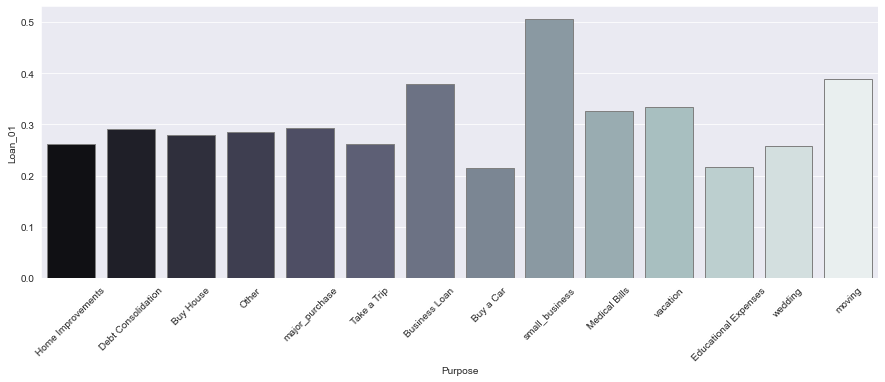

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1['Purpose'], y=df1['Loan_01'], ci=None, palette='bone', edgecolor='grey')
plt.xticks(rotation=45)
plt.show()

借款用途中呆帳率最高的是小型企業的貸款，高達51%，其次是搬家用途的貸款；而呆帳率最低的是車貸與教育支出貸款。

#### Numerical Features

In [53]:
from numpy import median

In [54]:
num_col = df1.dtypes[df1.dtypes == float].index.to_list()
num_col

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

##### Current Loan Amount

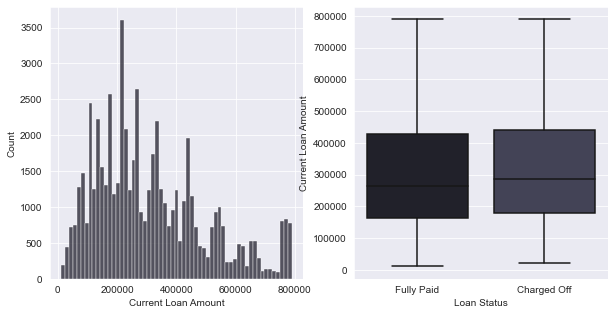

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17210.00,325408.20,185870.58,21450.00,179965.50,287749.00,440434.50,789096.00
Fully Paid,41937.00,305873.62,184622.12,11242.00,164582.00,264000.00,428780.00,789250.00


In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Loan Amount'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Loan Amount'])
plt.show()
df1['Current Loan Amount'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均當前貸款額略高。

##### Credit Score

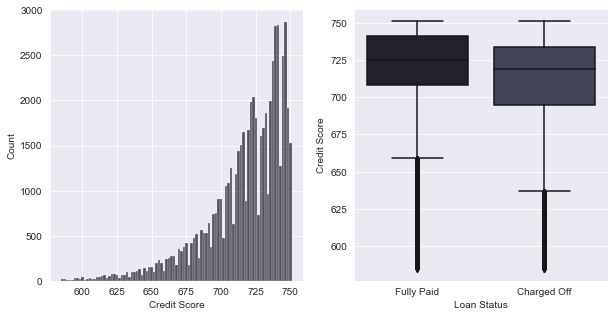

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17210.00,710.39,31.26,585.00,695.00,719.00,734.00,751.00
Fully Paid,41937.00,719.98,26.83,585.00,708.00,725.00,741.00,751.00


In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Credit Score'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Credit Score'])
plt.show()
df1['Credit Score'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均信用評分略低於已清償客戶。

##### Annual Income

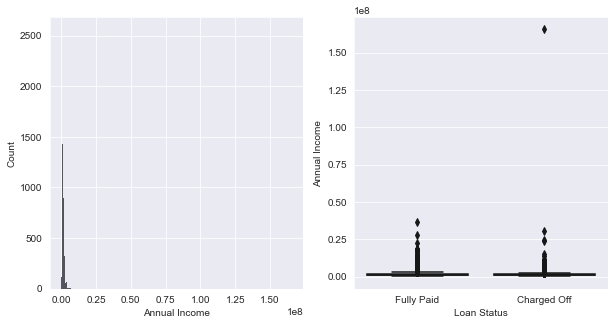

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17210.00,1267789.54,1506251.10,76627.00,778743.50,1085812.00,1507578.75,165557393.00
Fully Paid,41937.00,1411285.48,938153.88,81092.00,867540.00,1215734.00,1698543.00,36475440.00


In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Annual Income'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Annual Income'])
plt.show()
df1['Annual Income'].groupby(df1['Loan Status']).describe()

In [58]:
df1.drop(df1[df1['Annual Income'] > 10000000].index, axis=0, inplace=True)

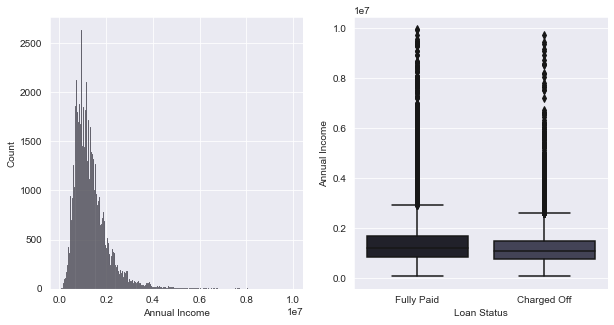

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17199.00,1249568.04,736685.82,76627.00,778696.00,1084748.00,1506538.50,9711850.00
Fully Paid,41897.00,1398645.90,830210.37,81092.00,867407.00,1215050.00,1697175.00,9939280.00


In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Annual Income'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Annual Income'])
plt.show()
df1['Annual Income'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均收入較低。

##### Monthly Debt

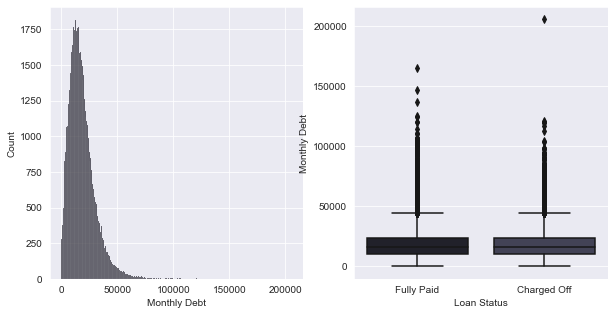

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17199.00,18654.03,11874.16,0.00,10560.58,16513.47,24061.51,205801.35
Fully Paid,41897.00,18335.08,11985.19,0.00,10084.44,16090.15,23926.32,165437.18


In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Monthly Debt'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Monthly Debt'])
plt.show()
df1['Monthly Debt'].groupby(df1['Loan Status']).describe()

In [61]:
df1.drop(df1[df1['Monthly Debt'] > 150000].index, axis=0, inplace=True)

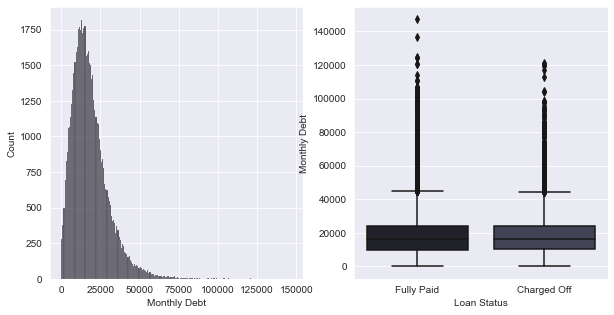

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17198.00,18643.15,11788.43,0.00,10559.63,16513.28,24060.03,121140.58
Fully Paid,41896.00,18331.57,11963.77,0.00,10084.30,16090.06,23925.75,147152.53


In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Monthly Debt'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Monthly Debt'])
plt.show()
df1['Monthly Debt'].groupby(df1['Loan Status']).describe()

每月債物與呆帳之間的關係不顯著，呆帳客戶的每月帳務僅高出大約500(中位數)。

##### Years of Credit History

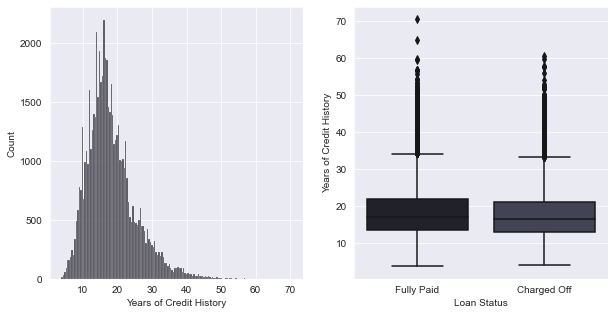

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17198.00,17.89,7.06,4.10,13.10,16.60,21.20,60.50
Fully Paid,41896.00,18.30,6.98,3.70,13.50,17.00,21.80,70.50


In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Years of Credit History'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Years of Credit History'])
plt.show()
df1['Years of Credit History'].groupby(df1['Loan Status']).describe()

信用紀錄年數與呆帳之間沒有顯著關係。

##### Number of Open Accounts

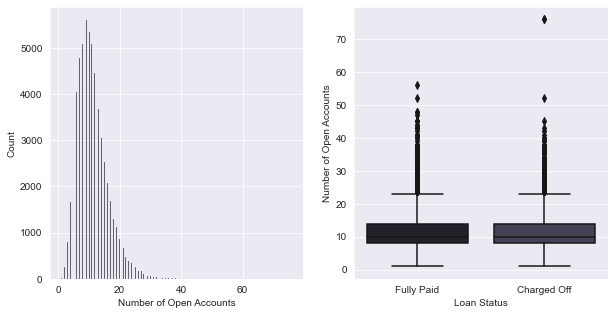

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17198.00,11.25,5.07,1.00,8.00,10.00,14.00,76.00
Fully Paid,41896.00,11.09,4.98,1.00,8.00,10.00,14.00,56.00


In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Number of Open Accounts'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Number of Open Accounts'])
plt.show()
df1['Number of Open Accounts'].groupby(df1['Loan Status']).describe()

戶頭數與呆帳間無顯著關係。

##### Number of Credit Problems

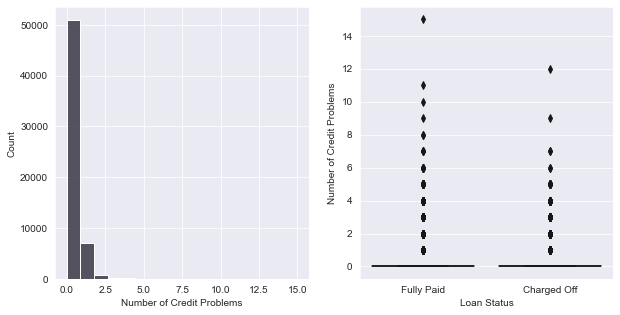

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17198.00,0.17,0.50,0.00,0.00,0.00,0.00,12.00
Fully Paid,41896.00,0.16,0.48,0.00,0.00,0.00,0.00,15.00


0.00     50962
1.00      7035
2.00       753
3.00       215
4.00        71
5.00        34
6.00        10
7.00         6
8.00         2
9.00         2
11.00        1
15.00        1
10.00        1
12.00        1
Name: Number of Credit Problems, dtype: int64


In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Number of Credit Problems'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Number of Credit Problems'])
plt.show()
display(df1['Number of Credit Problems'].groupby(df1['Loan Status']).describe())
print(df1['Number of Credit Problems'].value_counts())

In [66]:
print('Charging off rate:')
for i in df1['Number of Credit Problems'].unique():
    print(str(i),':',(df1['Number of Credit Problems'][(df1['Number of Credit Problems'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Number of Credit Problems'][df1['Number of Credit Problems'] == i].count()).round(2))

Charging off rate:
1.0 : 0.29
0.0 : 0.29
2.0 : 0.31
5.0 : 0.41
4.0 : 0.37
7.0 : 0.33
3.0 : 0.3
6.0 : 0.2
11.0 : 0.0
15.0 : 0.0
8.0 : 0.0
10.0 : 0.0
9.0 : 0.5
12.0 : 1.0


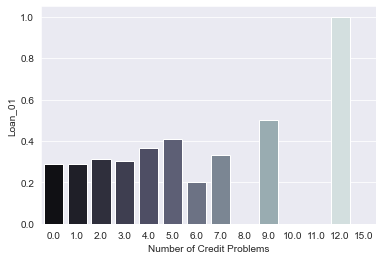

In [67]:
sns.barplot(x=df1['Number of Credit Problems'], y=df1['Loan_01'], ci=None, palette='bone')
plt.show()

信用問題個數與呆帳率成正比，但5之後因樣本數過少而不符規律，故將移除大於等於6之樣本。

In [68]:
df1.drop(df1[df1['Number of Credit Problems'] >= 6].index, axis=0, inplace=True)

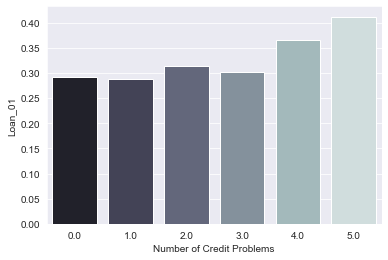

In [69]:
sns.barplot(x=df1['Number of Credit Problems'], y=df1['Loan_01'], ci=None)
plt.show()

##### Current Credit Balance

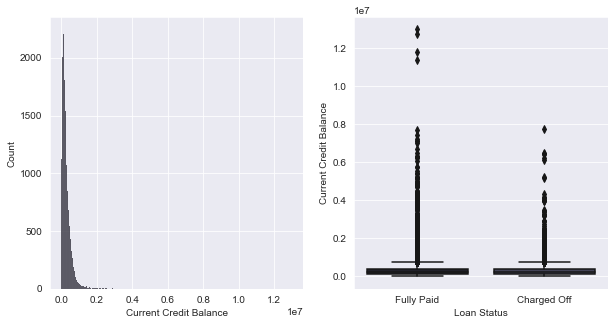

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17192.00,285965.86,302392.25,0.00,117610.00,214491.00,366961.25,7749587.00
Fully Paid,41878.00,294998.10,363900.54,0.00,111435.00,209323.00,367203.50,12986956.00


In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Credit Balance'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Credit Balance'])
plt.show()
display(df1['Current Credit Balance'].groupby(df1['Loan Status']).describe())

In [71]:
df1.drop(df1[df1['Current Credit Balance'] > 10000000].index, axis=0, inplace=True)

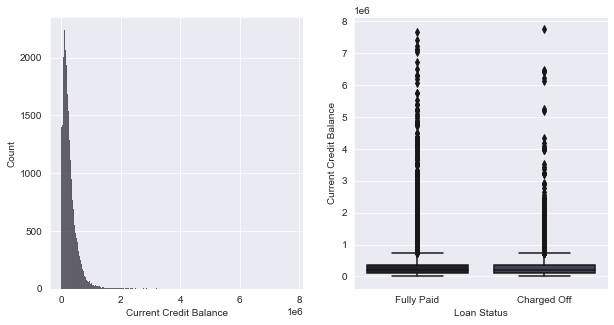

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17192.00,285965.86,302392.25,0.00,117610.00,214491.00,366961.25,7749587.00
Fully Paid,41874.00,293858.69,344675.61,0.00,111435.00,209304.00,367094.25,7679344.00


In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Credit Balance'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Credit Balance'])
plt.show()
display(df1['Current Credit Balance'].groupby(df1['Loan Status']).describe())

當前信用額度與呆帳率無顯著關聯。

##### Maximum Open Credit

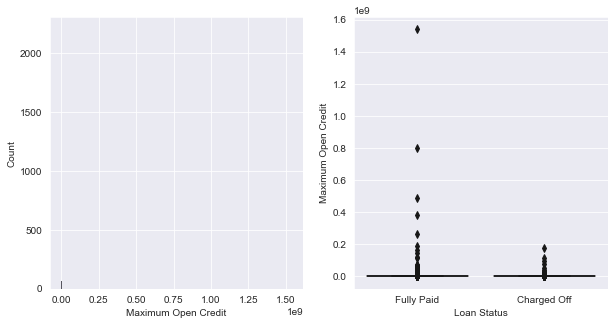

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17192.00,627980.79,2049281.39,0.00,264583.00,443817.00,727985.50,175043572.00
Fully Paid,41874.00,800915.35,9338416.68,0.00,277601.50,477499.00,804760.00,1539737892.00


In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Maximum Open Credit'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Maximum Open Credit'])
plt.show()
df1['Maximum Open Credit'].groupby(df1['Loan Status']).describe()

呆帳客戶的最大無擔保信貸較低。

##### Bankruptcies

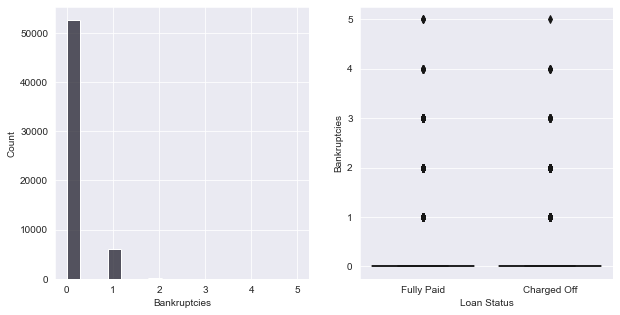

0.00    52653
1.00     6112
2.00      226
3.00       57
4.00       14
5.00        4
Name: Bankruptcies, dtype: int64
Charging off rate:
1.0 : 0.28
0.0 : 0.29
2.0 : 0.28
4.0 : 0.36
3.0 : 0.26
5.0 : 0.25


In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Bankruptcies'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Bankruptcies'])
plt.show()
print(df1['Bankruptcies'].value_counts())
print('Charging off rate:')
for i in df1['Bankruptcies'].unique():
    print(str(i),':',(df1['Bankruptcies'][(df1['Bankruptcies'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Bankruptcies'][df1['Bankruptcies'] == i].count()).round(2))

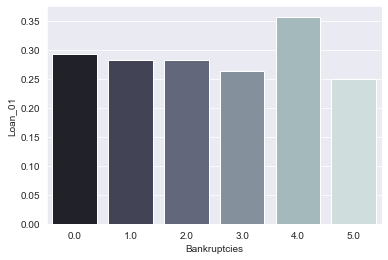

In [75]:
sns.barplot(x=df1['Bankruptcies'], y=df1['Loan_01'], ci=None, palette='bone')
plt.show()

破產次數在0到3時與呆帳率成反比，4、5因樣本數過少較無參考價值。

In [76]:
df1.drop(df1[df1['Bankruptcies'] > 3].index, axis=0, inplace=True)

##### Tax Liens

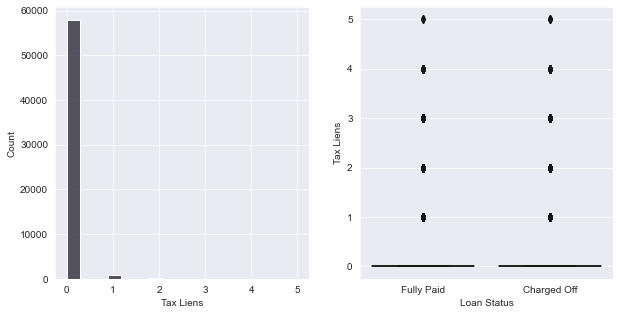

0.00    57942
1.00      782
2.00      220
3.00       59
4.00       35
5.00       10
Name: Tax Liens, dtype: int64
Charging off rate:
0.0 : 0.29
1.0 : 0.31
2.0 : 0.32
4.0 : 0.46
3.0 : 0.39
5.0 : 0.6


In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Tax Liens'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Tax Liens'])
plt.show()
print(df1['Tax Liens'].value_counts())
print('Charging off rate:')
for i in df1['Tax Liens'].unique():
    print(str(i),':',(df1['Tax Liens'][(df1['Tax Liens'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Tax Liens'][df1['Tax Liens'] == i].count()).round(2))

In [78]:
df1.drop(df1[df1['Tax Liens'] > 5].index, axis=0, inplace=True)

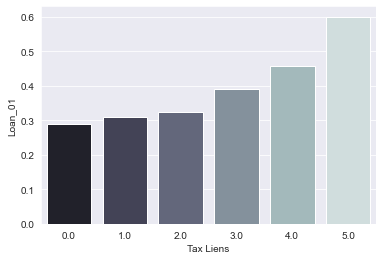

In [79]:
sns.barplot(x=df1['Tax Liens'], y=df1['Loan_01'], ci=None)
plt.show()

呆帳率與欠稅問題成正比。

In [80]:
df2 = df1.copy()

#### Outlier

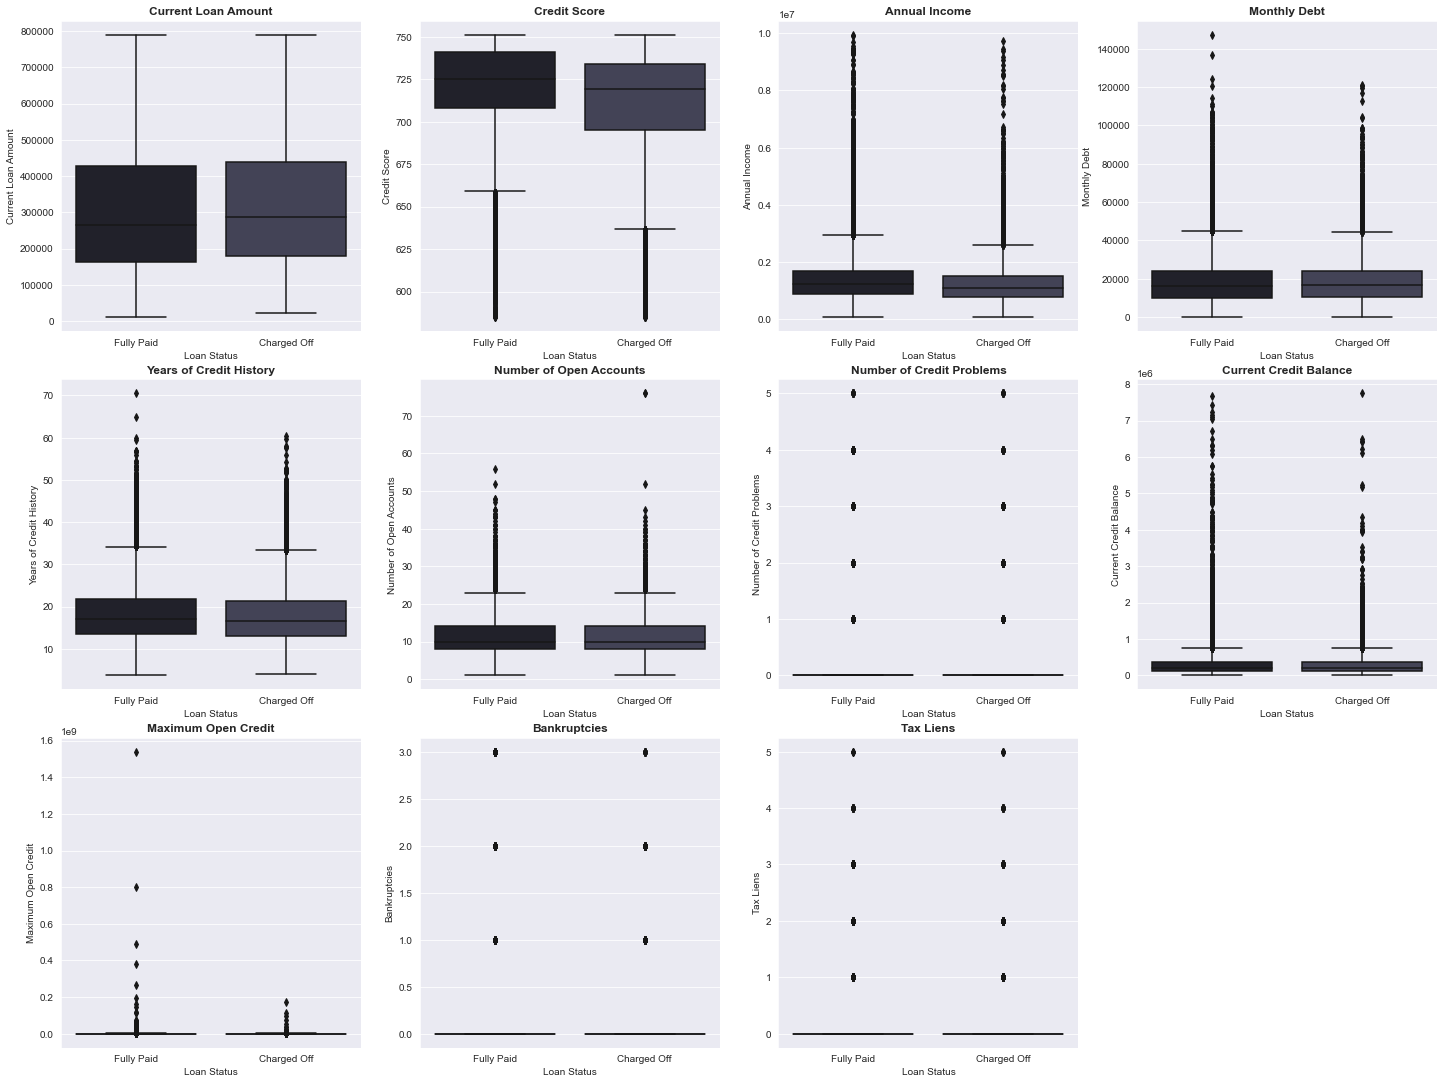

In [81]:
plt.figure(figsize=(20,15))
for i in range(len(num_col)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=df2['Loan Status'], y=df2[num_col[i]])
    plt.title(num_col[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [82]:
out_col = ['Credit Score','Annual Income','Monthly Debt',
           'Years of Credit History','Number of Open Accounts',
           'Current Credit Balance','Maximum Open Credit']

In [83]:
def remove_outlier(data,target,feat,value):
    n = 1.5
    IQR = data[feat].groupby(data[target]).quantile(.75) - data[feat].groupby(data[target]).quantile(.25)
    upper = (data[feat].groupby(data[target]).quantile(.75) + n * IQR)[value]
    lower = (data[feat].groupby(data[target]).quantile(.25) - n * IQR)[value]
    
    data = data.drop(data[(data[target] == value)&(data[feat] > upper)].index, axis=0)
    data = data.drop(data[(data[target] == value)&(data[feat] < lower)].index, axis=0)
    
    return data

In [84]:
for i in out_col:
    for j in df2['Loan Status'].unique():
        df2 = remove_outlier(df2, 'Loan Status', i, j)

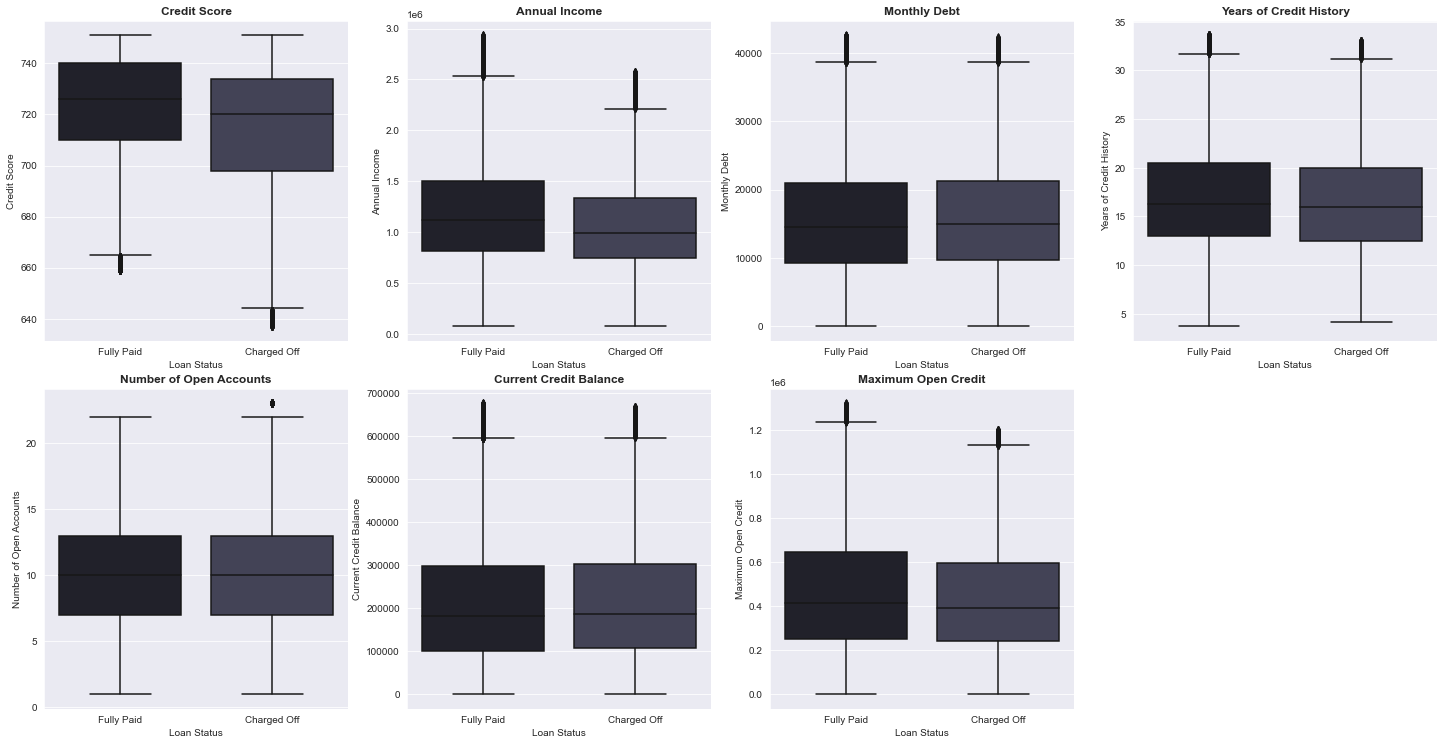

In [85]:
plt.figure(figsize=(20,15))
for i in range(len(out_col)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=df2['Loan Status'], y=df2[out_col[i]])
    plt.title(out_col[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [86]:
df2.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_01
count,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00,46072.00
mean,279946.02,719.93,1164647.08,5.75,15747.62,16.91,10.27,0.17,214459.38,461078.18,0.13,0.03,0.29
std,163018.14,23.10,505092.17,3.64,8605.96,5.74,4.11,0.46,146760.76,276394.97,0.35,0.21,0.46
min,11242.00,637.00,76627.00,0.00,0.00,3.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156112.00,707.00,785968.25,2.00,9324.58,12.90,7.00,0.00,102182.00,247654.00,0.00,0.00,0.00
50%,247027.00,724.00,1076046.00,6.00,14663.35,16.10,10.00,0.00,183141.00,406912.00,0.00,0.00,0.00
75%,375171.50,739.00,1449092.00,10.00,21061.97,20.40,13.00,0.00,299235.75,630707.00,0.00,0.00,1.00
max,789184.00,751.00,2932859.00,10.00,42558.10,33.60,23.00,5.00,676400.00,1319560.00,3.00,5.00,1.00


In [87]:
df2.drop(['Loan_01'], axis=1, inplace=True)

In [88]:
df3 = df2.copy()

#### Convert Category Features into Dummy Variables

In [89]:
df3.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,8,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
3,Fully Paid,347666.00,Long Term,721.00,806949.00,3,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
5,Charged Off,206602.00,Short Term,729.00,896857.00,10,Home Mortgage,Debt Consolidation,16367.74,17.30,6.00,0.00,215308.00,272448.00,0.00,0.00
6,Fully Paid,217646.00,Short Term,730.00,1184194.00,0,Home Mortgage,Debt Consolidation,10855.08,19.60,13.00,1.00,122170.00,272052.00,1.00,0.00
8,Fully Paid,548746.00,Short Term,678.00,2559110.00,2,Rent,Debt Consolidation,18660.28,22.60,4.00,0.00,437171.00,555038.00,0.00,0.00


In [90]:
df3['Loan Status'] = np.where(df3['Loan Status']=='Charged Off', 1, 0)
df3.rename(columns={'Loan Status':'Charged Off'}, inplace=True)

In [91]:
df3.dtypes

Charged Off                    int32
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job           int64
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [92]:
df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']] = df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']].astype('int32')
df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']] = df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']].astype('str')

In [93]:
df3 = pd.get_dummies(df3)
df3

,Charged Off,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Long Term,Term_Short Term,Years in current job_0,Years in current job_1,Years in current job_10,Years in current job_2,Years in current job_3,Years in current job_4,Years in current job_5,Years in current job_6,Years in current job_7,Years in current job_8,Years in current job_9,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_small_business,Purpose_vacation,Purpose_wedding,Number of Credit Problems_0,Number of Credit Problems_1,Number of Credit Problems_2,Number of Credit Problems_3,Number of Credit Problems_4,Number of Credit Problems_5,Bankruptcies_0,Bankruptcies_1,Bankruptcies_2,Bankruptcies_3,Tax Liens_0,Tax Liens_1,Tax Liens_2,Tax Liens_3,Tax Liens_4,Tax Liens_5
0,0,445412.00,709.00,1167493.00,5214.74,17.20,6.00,228190.00,416746.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,347666.00,721.00,806949.00,8741.90,12.00,9.00,256329.00,386958.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,1,206602.00,729.00,896857.00,16367.74,17.30,6.00,215308.00,272448.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,217646.00,730.00,1184194.00,10855.08,19.60,13.00,122170.00,272052.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,0,548746.00,678.00,2559110.00,18660.28,22.60,4.00,437171.00,555038.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,0,766392.00,717.00,1891070.00,41130.82,15.40,20.00,604485.00,969430.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
99980,0,336776.00,745.00,1192459.00,31600.04,16.90,14.00,347643.00,888558.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99994,0,210584.00,719.00,783389.00,3727.61,17.40,6.00,456.00,259160.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99997,0,103136.00,742.00,1150545.00,7315.57,18.80,12.00,109554.00,537548.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [94]:
df3.sum().sort_values()

Tax Liens_5                              6.00
Number of Credit Problems_5             19.00
Tax Liens_4                             22.00
Purpose_vacation                        42.00
Number of Credit Problems_4             44.00
Tax Liens_3                             45.00
Purpose_Educational Expenses            46.00
Bankruptcies_3                          48.00
Purpose_wedding                         49.00
Purpose_moving                          69.00
Home Ownership_HaveMortgage             94.00
Purpose_small_business                 121.00
Tax Liens_2                            152.00
Purpose_major_purchase                 166.00
Number of Credit Problems_3            173.00
Bankruptcies_2                         202.00
Purpose_Take a Trip                    271.00
Purpose_Buy House                      283.00
Purpose_Medical Bills                  501.00
Tax Liens_1                            596.00
Purpose_Buy a Car                      609.00
Number of Credit Problems_2       

In [95]:
df3.drop(['Term_Short Term','Home Ownership_Home Mortgage','Purpose_Debt Consolidation',
          'Tax Liens_0','Bankruptcies_0','Years in current job_10','Number of Credit Problems_0'],
         axis=1,
         inplace=True)

#### VIF

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [97]:
features = df3.drop(['Charged Off'], axis = 1).columns.to_list()

In [98]:
def VIF(variables, data):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['features'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif = vif[vif['features']!='const']
    return vif

In [99]:
VIF(features, df3).sort_values('VIF', ascending=False)

,features,VIF
36,Number of Credit Problems_1,6.44
41,Bankruptcies_1,6.21
8,Maximum Open Credit,2.62
7,Current Credit Balance,2.54
37,Number of Credit Problems_2,2.49
38,Number of Credit Problems_3,2.42
40,Number of Credit Problems_5,2.26
47,Tax Liens_4,1.93
4,Monthly Debt,1.83
1,Current Loan Amount,1.82


所有自變數的膨脹係數皆未高於10，故不須刪除變數。

#### Modeling

In [100]:
pip install imblearm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblearm (from versions: none)
ERROR: No matching distribution found for imblearm


In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [102]:
X = df3.drop('Charged Off', axis = 1)
y = df3['Charged Off']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
print('X_train :', X_train.shape[0])
print('X_test :', X_test.shape[0])
print('y_train :', y_train.shape[0])
print('y_test :', X_test.shape[0])

X_train : 32250
X_test : 13822
y_train : 32250
y_test : 13822


In [105]:
scaler = StandardScaler() 

In [106]:
scaled_col = ['Current Loan Amount', 'Credit Score','Annual Income', 'Monthly Debt', 
              'Years of Credit History','Number of Open Accounts','Current Credit Balance','Maximum Open Credit']

In [107]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [108]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[scaled_col]),np.array(X_train.drop(scaled_col, axis = 1))))
X_test_scaled = np.hstack((scaler.fit_transform(X_test[scaled_col]),np.array(X_test.drop(scaled_col, axis = 1))))

應變數的比例嚴重失衡，故採取SMOTE進行過採樣。

In [109]:
X_train_scaled_res, y_train_scaled_res = SMOTE().fit_resample(X_train_scaled, y_train)

In [110]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

In [111]:
print(y_train_res.value_counts())

0    22842
1    22842
Name: Charged Off, dtype: int64


In [113]:
log_reg = LogisticRegression()
log_reg_score = cv(log_reg, X_train_scaled, y_train, cv=5, n_jobs=-1)
log_reg_mean = log_reg_score.mean()

log_reg_res_score = cv(log_reg, X_train_scaled_res, y_train_scaled_res, cv=5, n_jobs=-1)
log_reg__res_mean = log_reg_res_score.mean()

svc = SVC()
svc_score = cv(svc, X_train_scaled, y_train, cv=5, n_jobs=-1)
svc_mean = svc_score.mean()

svc_res_score = cv(svc, X_train_scaled_res, y_train_scaled_res, cv=5, n_jobs=-1)
svc_res_mean = svc_res_score.mean()

rf = RandomForestClassifier()
rf_score = cv(rf, X_train, y_train, cv=5, n_jobs=-1)
rf_mean = rf_score.mean()

rf_res_score = cv(rf, X_train_res, y_train_res, cv=5, n_jobs=-1)
rf_res_mean = rf_res_score.mean()

gb = GradientBoostingClassifier()
gb_score = cv(gb, X_train, y_train, cv=5, n_jobs=-1)
gb_mean = gb_score.mean()

gb_res_score = cv(gb, X_train_res, y_train_res, cv=5, n_jobs=-1)
gb_res_mean = gb_res_score.mean()

result = ({'Model':['Logistic Regression','Logistic Regression SMOTE',
                    'SVC','SVC SMOTE',
                    'Random Forest','Random Forest SMOTE',
                    'Gradient Boosting','Gradient Boosting SMOTE'],
           'Mean Score':[log_reg_mean, log_reg__res_mean, svc_mean, svc_res_mean,
                         rf_mean, rf_res_mean, gb_mean, gb_res_mean]})
train_score = pd.DataFrame(result)

In [114]:
train_score.sort_values('Mean Score', ascending=False)

,Model,Mean Score
5,Random Forest SMOTE,0.74
6,Gradient Boosting,0.72
2,SVC,0.72
4,Random Forest,0.72
0,Logistic Regression,0.72
7,Gradient Boosting SMOTE,0.71
3,SVC SMOTE,0.66
1,Logistic Regression SMOTE,0.62


使用過採樣數據的隨機森林模型表現最佳。

In [115]:
rf_param = {'n_estimators':[None,150,200,250],
            'max_depth':[None,10,20,30],
            'max_features':['sqrt'],
            'max_samples':[0.68,0.8]}
rf_gscv = GridSearchCV(rf, rf_param, cv=5, n_jobs=-1)

In [116]:
rf_gscv.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt'], 'max_samples': [0.68, 0.8],
                         'n_estimators': [None, 150, 200, 250]})

In [117]:
rf_gscv.best_estimator_

RandomForestClassifier(max_features='sqrt', max_samples=0.8, n_estimators=200)

In [118]:
RF_model = RandomForestClassifier(n_estimators=200,
                                  max_depth=None,
                                  max_features='sqrt',
                                  max_samples=0.8,
                                  random_state=42,
                                  n_jobs=-1)
RF_model.fit(X_train_res, y_train_res)
y_pred = RF_model.predict(X_test)
print('Train Score:', RF_model.score(X_train_res, y_train_res))
print('Test Score:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Score: 1.0
Test Score: 0.669801765301693
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      9741
           1       0.41      0.26      0.32      4081

    accuracy                           0.67     13822
   macro avg       0.57      0.55      0.55     13822
weighted avg       0.64      0.67      0.65     13822



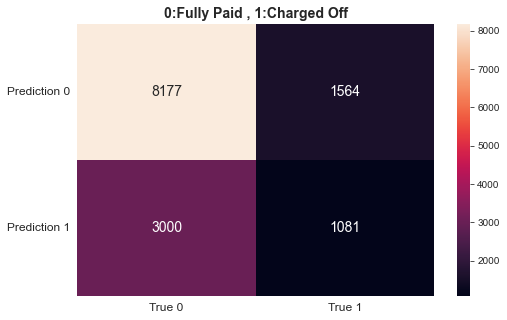

In [119]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            annot_kws={'size':14},
            fmt='d',
            yticklabels=['Prediction 0', 'Prediction 1'],
            xticklabels=['True 0', 'True 1'])
plt.title('0:Fully Paid , 1:Charged Off', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=360)
plt.show()

此模型的準確度僅67%，在2645個呆帳客戶中僅有1081位被成功辨認出，原因可由先前之分析看出，此數據有大部分變數與客戶呆帳率之間並無顯著相關，造成模型對於目標變數的辨認能力有限，若要加強此模型的準確度則需再多納入其他解釋變數。